In [3]:
# ref 
# medium : https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33

In [1]:
#Load libraries
from sklearn.datasets import load_boston
import copy 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

#Load data
boston = load_boston()
X, y = load_boston(return_X_y=True)

#Create data frame
columns = boston.feature_names
df = pd.DataFrame(X, columns = columns)

/mnt/hdd/eric/.conda/envs/mah_v1/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

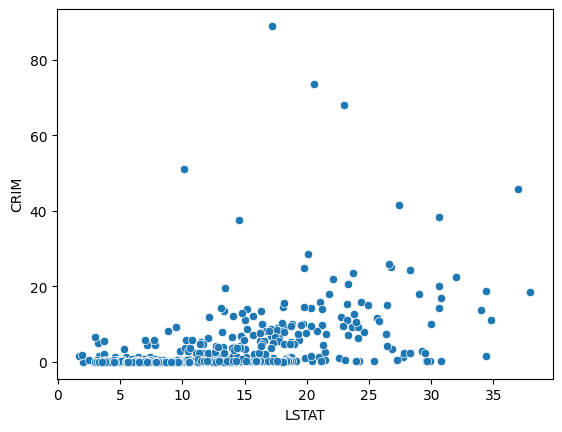

In [5]:
#Scatterpblot
ax = sns.scatterplot(x="LSTAT", y="CRIM", data=df)

In [9]:
# Like the z-score, the MD of each observation is compared to a cut-off point. Assuming a multivariate normal distribution of the data with K variables, the Mahalanobis distance follows a chi-squared distribution with K degrees of freedom. Using a reasonable significance level (e.g., 2.5%, 1%, 0.01%), the cut-off point is defined as:
# Mahalnobis distance 를 사용하였을 때, chi-square distribution with K degrees of freedom. 

In [8]:
#--- chi-squre distribution test


In [30]:
#Mahalonibis Distance

def mahalanobis_method(df):
    #M-Distance
    x_minus_mu = df - np.mean(df)
    cov = np.cov(df.values.T)                           #Covariance
    inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    #Cut-off point
    C = np.sqrt(chi2.ppf((0.95), df=df.shape[1]))    #degrees of freedom = number of variables
    print("cut off : ", C)
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

In [31]:
# 'CRIM' : 도시별 1인당 범죄율 
# 'LSTAT' : 인구 중 낮은 지위 

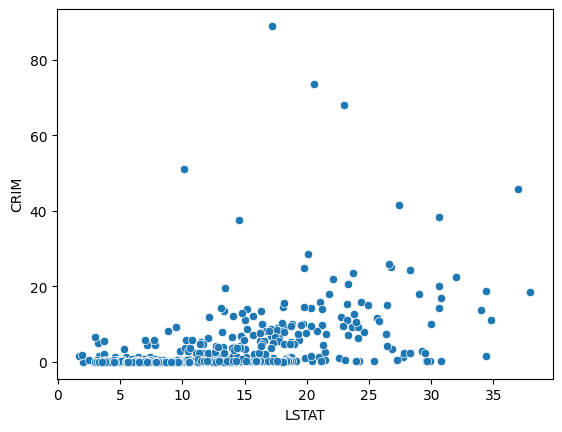

In [32]:
#Scatterpblot
ax = sns.scatterplot(x="LSTAT", y="CRIM", data=df)

In [33]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [34]:

#outliers_mahal_bi, md_bi = mahalanobis_method(df=df_bivariate)
#[380, 398, 404, 405, 410, 414, 418, 427]

outliers_mahal, md = mahalanobis_method(df=df)
#[152, 155, 214, 353, 364, 365, 367, 380, 405, 410, 414, 418, 488, 489, 490, 491, 492]

cut off :  4.728851075560208


In [35]:
len(outliers_mahal)

506

In [36]:
len(md)

506

In [38]:
md

array([1320.97576481, 1321.96532319, 1321.37898282, 1320.52064954,
       1320.60367542, 1320.95533419, 1321.62139124, 1321.93897286,
       1322.17527164, 1321.63747294, 1321.70952208, 1321.69169556,
       1321.23432567, 1320.23894271, 1320.66221769, 1320.25866709,
       1319.76103296, 1320.70733992, 1320.37707191, 1320.74259114,
       1321.29173961, 1320.91670975, 1320.89214146, 1321.12641967,
       1320.892919  , 1320.93701959, 1320.79928297, 1320.81585257,
       1320.67223208, 1320.55512117, 1321.04834784, 1321.01918299,
       1320.94061964, 1321.21110996, 1321.19726721, 1321.74050942,
       1321.66983516, 1321.13691022, 1320.92904665, 1321.12699736,
       1320.86357796, 1320.68804551, 1320.97949285, 1320.95056634,
       1321.57780188, 1321.80576637, 1321.75535542, 1322.37082848,
       1322.71418826, 1322.00409327, 1321.73058456, 1321.97326531,
       1321.10723609, 1321.30509238, 1321.22615461, 1320.31661337,
       1320.65493991, 1321.44719305, 1320.37892501, 1321.03865

In [41]:
#Robust Mahalonibis Distance
def robust_mahalanobis_method(df):
    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df.values.T)
    X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    
    #Robust M-Distance
    x_minus_mu = df - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

#outliers_mahal_rob_bi, md_rb_bi = robust_mahalanobis_method(df=df_bivariate)
#[141, 374, 380, 398, 404, 405, 410, 414, 418, 427]

outliers_mahal_rob, md_rb = robust_mahalanobis_method(df=df)
#[123, 126, 142, 152, 155, 163, 214, 283, 353, 364, 365, 367, 380, 405, 410, 
# 418, 488, 489, 490, 491, 492]

print(outliers_mahal_rob)
print(len(outliers_mahal_rob))

[123, 126, 142, 152, 155, 163, 214, 283, 353, 364, 365, 367, 380, 405, 410, 418, 488, 489, 490, 491, 492]
21


In [ ]:
#Visualization
#You need deep copy otherwise cannot 
#add column to a slice of a DataFrame
df_bi_cp = copy.deepcopy(df_bivariate) 

#Add md and robust md to copy of dataframe
df_bi_cp['md'] = md_bi
df_bi_cp['md_robust'] = md_rb_bi

def flag_outliers(df, outliers):
    flag = []
    for index in range(df.shape[0]):
        if index in outliers:
            flag.append(1)
        else:
            flag.append(0)
    return flag

#Flag outliers with 1, others with 0
df_bi_cp['flag'] = flag_outliers(df_bivariate, outliers_mahal_bi)
df_bi_cp['flag_rob'] = flag_outliers(df_bivariate, outliers_mahal_rob_bi)

#MD classic
ax = sns.scatterplot(x="LSTAT", y="CRIM", hue='flag', data=df_bi_cp)
#MD robust
ax = sns.scatterplot(x="LSTAT", y="CRIM", hue='flag_rob', data=df_bi_cp)